In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [60]:
# 2. Load dataset dari file Excel
df = pd.read_excel('prakiraan_cuaca_sintetis.xlsx')

In [61]:
df.head()

,Suhu (Celsius),Kelembaban (%),Kecepatan Angin (km/jam),Tebal Awan (meter),Tekanan Atmosfer (hPa),Prakiraan Cuaca
0,15.0,26.7,13.1,6727,1020.0,Berawan
1,38.0,58.8,12.3,7967,1036.4,Berawan
2,29.3,88.6,45.3,2505,1033.2,Hujan Lebat
3,23.9,75.9,12.5,6249,990.8,Berawan
4,6.2,82.6,13.6,5717,990.4,Hujan Lebat


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Suhu (Celsius)            1000 non-null   float64
 1   Kelembaban (%)            1000 non-null   float64
 2   Kecepatan Angin (km/jam)  1000 non-null   float64
 3   Tebal Awan (meter)        1000 non-null   int64  
 4   Tekanan Atmosfer (hPa)    1000 non-null   float64
 5   Prakiraan Cuaca           1000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [63]:
#Preproses Data
df.isnull().sum()

,0
Suhu (Celsius),0
Kelembaban (%),0
Kecepatan Angin (km/jam),0
Tebal Awan (meter),0
Tekanan Atmosfer (hPa),0
Prakiraan Cuaca,0


In [64]:
counts = df['Prakiraan Cuaca'].value_counts()
print("Distribusi Prakiraan Cuaca:")
print(counts)

Distribusi Prakiraan Cuaca:
Prakiraan Cuaca
Berawan         304
Cerah           301
Hujan Ringan    195
Hujan Lebat     140
Badai            60
Name: count, dtype: int64


In [65]:
mapping = {'Cerah': 'Tidak Hujan', 'Berawan': 'Tidak Hujan', 'Hujan Ringan' : 'Hujan', 'Hujan Lebat': 'Hujan', 'Badai' : 'Hujan'}

In [66]:
df['Prakiraan Cuaca'] = df['Prakiraan Cuaca'].replace(mapping)

In [67]:
df['Prakiraan Cuaca'].value_counts()

,count
Prakiraan Cuaca,
Tidak Hujan,605
Hujan,395


In [68]:
# Labeling
lb_make = LabelEncoder()
df['Prakiraan'] = lb_make.fit_transform(df['Prakiraan Cuaca'])
df['Prakiraan'].value_counts()

,count
Prakiraan,
1,605
0,395


In [69]:
#Split Data
X = df[['Suhu (Celsius)', 'Kelembaban (%)', 'Kecepatan Angin (km/jam)',
          'Tebal Awan (meter)', 'Tekanan Atmosfer (hPa)']]

y = df['Prakiraan']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [72]:
# Random Forest dengan tuning parameter
rf = RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=4, random_state=42)
rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, min_samples_split=4, n_estimators=200,
                       random_state=42)

In [73]:
# Prediksi
rf_pred = rf.predict(X_test)

In [74]:
# Prediksi pada data test
rf_pred = rf.predict(X_test)

# Hitung akurasi
train_acc = rf.score(X_train_res, y_train_res)
test_acc = accuracy_score(y_test, rf_pred)

print("Akurasi training: {:.2f}%".format(train_acc * 100))
print("Akurasi test: {:.2f}%".format(test_acc * 100))
print("\nClassification Report:\n", classification_report(y_test, rf_pred, target_names=['Hujan', 'Tidak Hujan']))


Akurasi training: 100.00%
Akurasi test: 53.50%

Classification Report:
               precision    recall  f1-score   support

       Hujan       0.40      0.42      0.41        77
 Tidak Hujan       0.62      0.61      0.62       123

    accuracy                           0.54       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.54      0.54      0.54       200



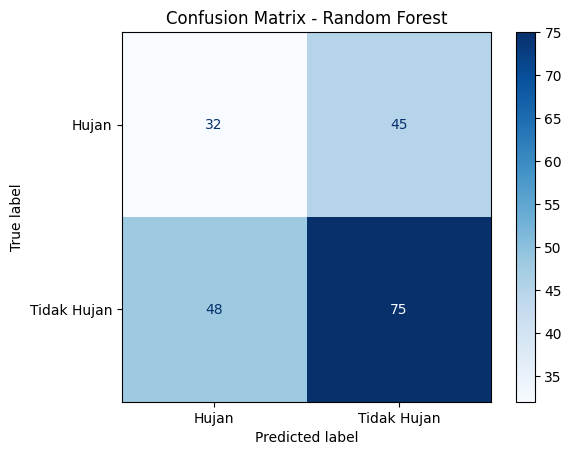

In [75]:
# Confusion Matrix Random Forest
cm_rf = confusion_matrix(y_test, rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Hujan', 'Tidak Hujan'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

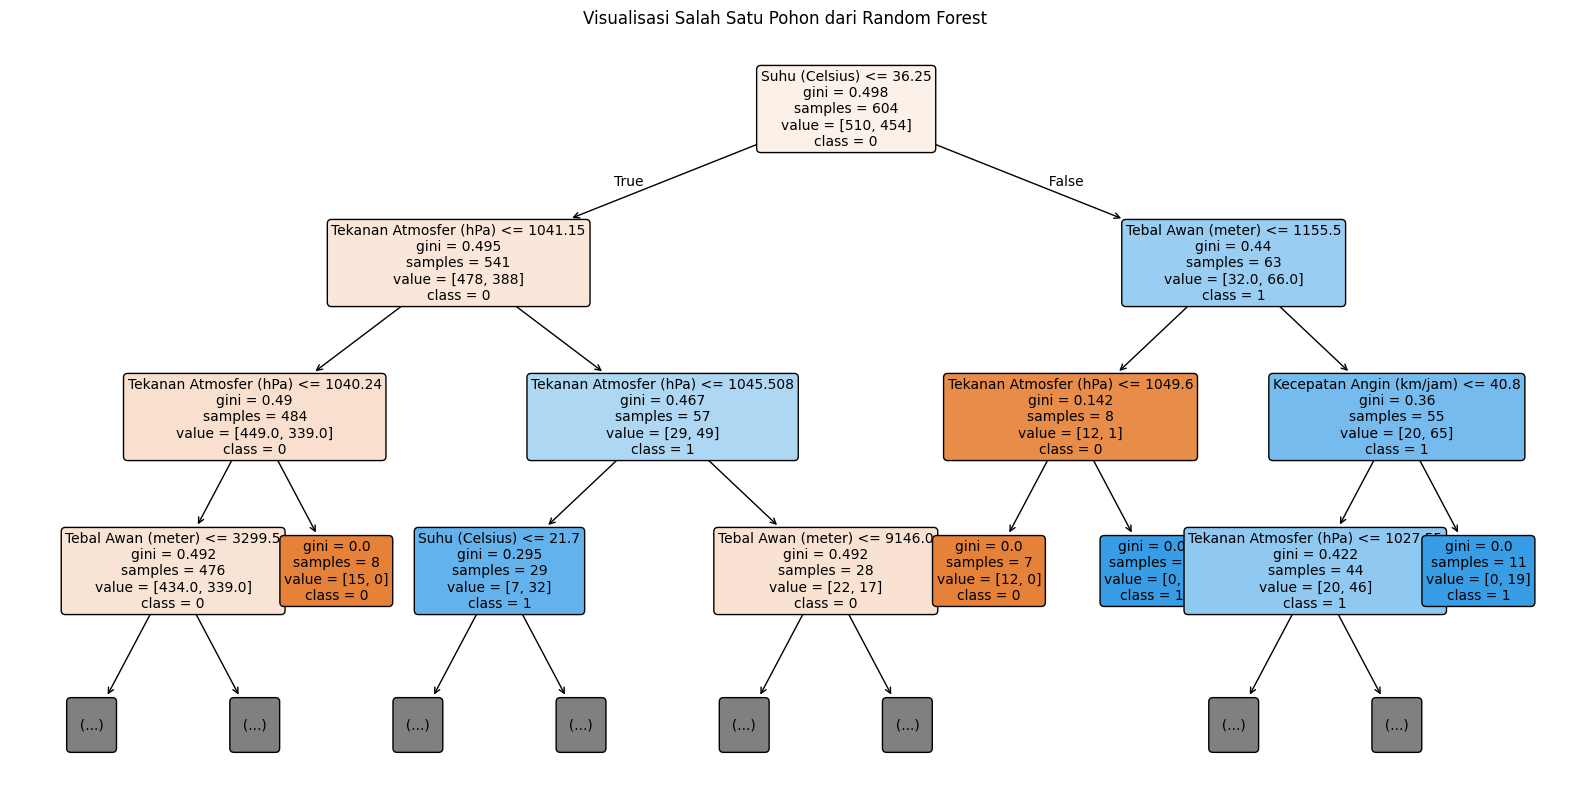

In [78]:
# 1) List nama kolom numerik
num_cols = X_train_res.columns.tolist()

# 2) Class names, di-convert ke string jika aslinya numerik
class_names_str = [str(c) for c in rf.classes_]

# 3) Pilih satu pohon
est = rf.estimators_[0]

# 4) Plot
plt.figure(figsize=(20, 10))
plot_tree(
    est,
    feature_names=num_cols,
    class_names=class_names_str,
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)
plt.title("Visualisasi Salah Satu Pohon dari Random Forest")
plt.show()


In [80]:
# Simpan model ke file
joblib.dump(rf, 'weather_model.pkl')

['weather_model.pkl']

In [81]:
from google.colab import files

# Unduh file ke komputer lokal
files.download('weather_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>